# Cut Photos

## Methods definition

In [9]:
from PIL import Image
import os

def cut_image(image_path, nx, ny, output_dir):
    """
    Cuts an image into nx by ny rectangles and saves them as separate files.

    :param image_path: Path to the input image.
    :param nx: Number of horizontal divisions.
    :param ny: Number of vertical divisions.
    :param output_dir: Directory to save the output images.
    """
    # Open the image
    img = Image.open(image_path)
    width, height = img.size

    # Calculate the size of each rectangle
    rect_width = width // nx
    rect_height = height // ny

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    image_name = os.path.basename(image_path).split('.')[0]

    # Loop through the grid and save each rectangle
    for i in range(ny):
        for j in range(nx):
            # Define the bounding box for the rectangle
            left = j * rect_width
            upper = i * rect_height
            right = (j + 1) * rect_width
            lower = (i + 1) * rect_height

            # Crop the rectangle
            cropped_img = img.crop((left, upper, right, lower))

            # Resize the cropped image to the rectangle size (if needed)
            resized_img = cropped_img.resize((rect_width, rect_height))

            # Save the rectangle as a new image
            output_path = os.path.join(output_dir, f"{image_name}_{i}_{j}.png")
            resized_img.save(output_path)

    print(f"Images saved in {output_dir}")

In [ ]:
def download_wikipedia_image(image_url, output_path):
    """
    Downloads an image from a Wikipedia URL and saves it locally.

    :param image_url: The URL of the image on Wikipedia.
    :param output_path: The path to save the downloaded image.
    """
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    try:
        # Send a GET request to the image URL with headers
        response = requests.get(image_url, headers=headers, stream=True)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Save the image to the specified path
            with open(output_path, "wb") as f:
                for chunk in response.iter_content(1024):
                    f.write(chunk)
            print(f"Image downloaded and saved to {output_path}")
        else:
            print(f"Failed to download image. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
download_wikipedia_image(
    image_url="https://upload.wikimedia.org/wikipedia/commons/6/66/Bern_007_%2835250800705%29.jpg",
    output_path="./bern.jpg"
)

In [10]:
cut_image(
    image_path='./bern.jpg',
    nx=5, ny=5,
    output_dir='./outputs/bern/'
)

Images saved in ./outputs/bern/


In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images_in_grid(image_dir, nx, ny):
    """
    Displays images from a directory in a grid.

    :param image_dir: Directory containing the images to display.
    :param nx: Number of columns in the grid.
    :param ny: Number of rows in the grid.
    """
    # Get a sorted list of image file paths
    image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

    # Create a figure for the grid
    fig, axes = plt.subplots(ny, nx, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Loop through the images and display them
    for i, ax in enumerate(axes):
        if i < len(image_files):
            img = Image.open(image_files[i])
            ax.imshow(img)
            ax.axis('off')  # Hide axes for a cleaner look
        else:
            ax.axis('off')  # Hide unused grid cells

    plt.tight_layout()
    plt.show()

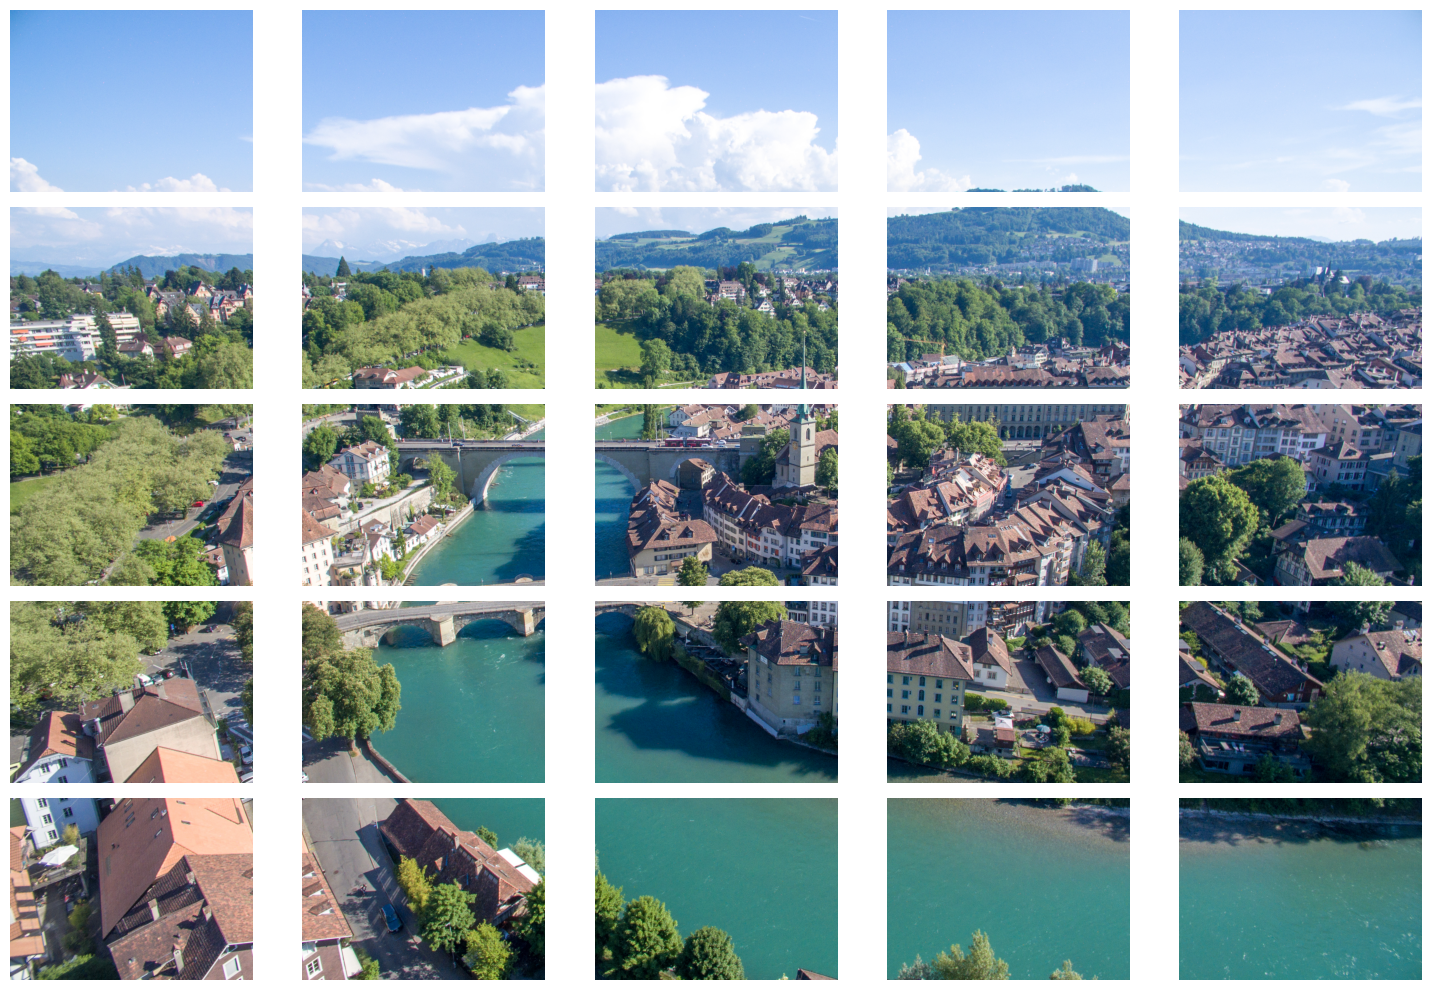

In [12]:
display_images_in_grid(
    image_dir='./outputs/bern',
    nx=5, ny=5
)

In [13]:
from PIL import Image, ImageDraw

def create_grid_image(image_dir, nx, ny, spacing, output_path):
    """
    Creates a new image with a grid of images from a directory, including white space between images.

    :param image_dir: Directory containing the images to include in the grid.
    :param nx: Number of columns in the grid.
    :param ny: Number of rows in the grid.
    :param spacing: Width of the white space between images (in pixels).
    :param output_path: Path to save the resulting grid image.
    """
    # Get a sorted list of image file paths
    image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

    # Open the first image to get its dimensions
    if not image_files:
        print("No images found in the directory.")
        return
    sample_img = Image.open(image_files[0])
    img_width, img_height = sample_img.size

    # Calculate the size of the grid image
    grid_width = nx * img_width + (nx - 1) * spacing
    grid_height = ny * img_height + (ny - 1) * spacing

    # Create a blank white image for the grid
    grid_img = Image.new("RGB", (grid_width, grid_height), "white")

    # Paste each image into the grid
    for i in range(ny):
        for j in range(nx):
            idx = i * nx + j
            if idx < len(image_files):
                img = Image.open(image_files[idx])
                x_offset = j * (img_width + spacing)
                y_offset = i * (img_height + spacing)
                grid_img.paste(img, (x_offset, y_offset))

    # Save the resulting grid image
    grid_img.save(output_path)
    print(f"Grid image saved to {output_path}")

    # Display the grid image
    plt.figure(figsize=(10, 10))
    plt.imshow(grid_img)
    plt.axis('off')
    plt.show()

Grid image saved to ./outputs/bern_nx5_ny5_sp40.jpg


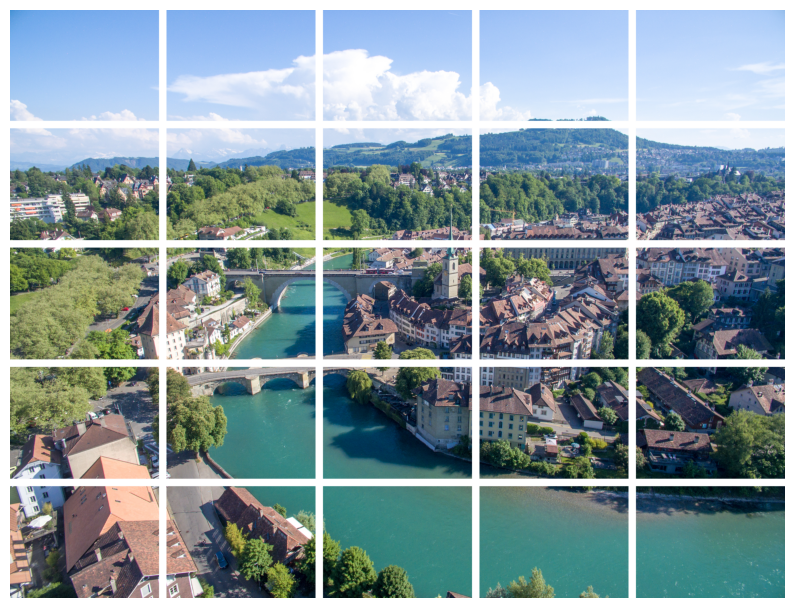

In [16]:
create_grid_image(
    image_dir='./outputs/bern',
    nx=5, ny=5,
    spacing=40,
    output_path='./outputs/bern_nx5_ny5_sp40.jpg'
)